<a href="https://colab.research.google.com/github/chohyungrae/-Artificial-Intelligence-and-Image-Learning-/blob/master/Synthesize_Cute_Animals_with_W%26B_and_StarGAN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cute Animal Synthesizer: StarGAN-V2 Demo

What would a kitten look like as a wolf? What about a golden retriever with cloud leopard spots? Or a tiger as a Corgi? While we wait for the slow process of evolution and selection, machine learning can give us a pretty good preview!

This notebook relies on the amazing [StarGAN v2](https://github.com/clovaai/stargan-v2) repository and logs the generated images to [Weights & Biases](https://www.wandb.com). You can use the sample images provided or upload your own image files via the Files icon in the left hand sidebar (you will have to sign in to a Google account to enable this).

Paper: [StarGANv2: Diverse Image Synthesis for Multiple Domains](https://arxiv.org/abs/1912.01865)

Video: [https://youtu.be/0EVh5Ki4dIY](https://youtu.be/0EVh5Ki4dIY)

## Example output with reference or style image

![sample reference](https://i.imgur.com/FPAlB1O.jpg)

Above, the first row shows a variety of source images: the desired content or identity for the generated image, imparting their pose, expression, and overall shape to the result. The first column shows the reference image: the desired style for the generated image, imparting its textures and colors to the the result. There are three rows shown for the same reference image, each using a different target domain, or desired type of animal: "cat", "dog", and "wildlife", from top to bottom.

## Example output with source or identity image

![sample source](https://i.imgur.com/A1cYW44.png)

The first row shows the source or identity image. This image will impart its pose, expression, and overall shape to the result. The first column shows reference images, which impart their style (texture/color) to the result. In this case, a single reference image is repeated three times, one row for each target domain of "cat", "dog", and "wildlife", in order. If you do not specify a reference image, the network will use a variety of sample reference images across domains, generating many more rows than would fit easily in this section. [Here is an example logged to W&B](https://app.wandb.ai/stacey/stargan/runs/2wf48syi?workspace=user-stacey).

## Setup
Download dependencies (may take a little while).


In [3]:
%%capture
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip3 install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

Download and login to wandb, the [Weights & Biases Python package](https://docs.wandb.com/quickstart) for tracking & analyzing ML experiments.

In [4]:
!pip3 install wandb -qqq
import wandb
wandb.login()

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 163kB 17.3MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 112kB 16.6MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Download sample images, W&B fork of StarGAN-v2 (with small modifications for logging and custom visualization), and the StarGAN-v2 network, pretrained by the paper authors on the Animal Faces High Quality (AFHQ) dataset of 15,000 images. 

The sample images will show up in a folder called "sample_images", sorted into "cat", "dog", and "wildlife" categories. You can browse these via the Files icon and left sidebar.

In [5]:
%%capture
!curl -SL https://storage.googleapis.com/wandb_datasets/stargan_samples.zip > samples.zip
!unzip samples.zip

!git clone https://github.com/staceysv/stargan-v2.git
%cd stargan-v2
!bash download.sh pretrained-network-afhq
!bash download.sh wing
%cd ..

# Generate some cute animals

You can use the example images (from the original repo and some generous contributors) or provide your own! To upload your own images, use the Folder icon in the left-most sidebar to enable drag-and-drop from your desktop. 

### For your own photos

For best results: 
* use a high-quality photo
* where the animal is looking directly at the camera
* take a **SQUARE CLOSE CROP of the animal's face**.

## Settings

File names should exactly match the full path to an example file inside the "sample_images" directory (e.g. "cat/ll2_cat.png", "dog/ar_dog.png", "wildlife/flickr_wild_000432.jpg") or the full name of a file you upload. Note that you can rename files after you upload them to Google Colab by hovering over the file name and clicking on the three vertical dots at the right edge of the sidebar. JPG, JPEG, and PNG formats should all work; please pay attention to the file formats as they differ across examples.

If you don't want to provide a specific file, simply set the argument to the empty string, "". If either argument is empty, the notebook will use the default sample images provided in the original StarGAN-v2 repository.

### 1. SOURCE IMAGE PATH
Below this comment in the code, set source_image = "full path to source / content image file". Type the full name of your source/content file, if any, in the command below, replacing the default setting "dog/mo_dog.jpeg". The source or content image will impart its identity (more precisely its pose, overall shape, and facial expression) to the final image.

### 2. REFERENCE IMAGE PATH
Below this comment in the code, set reference_image = "full path to reference / style image file". Type the full name of your reference/style file, if any, in the command below, replacing the default setting "cat/ss_cat.jpg". The reference or style image will impart its style, or more precisely its color and texture, to the final image.

### 3. Optional: output_image_file = "name of local result file"
If you'd like to save a local copy of your result to this notebook in a particular file, provide that file path to the output_image_file variable to replace the current default ("starganv2_cross.jpg"). Otherwise the results will be saved to a default file and overwritten after every run.

### launch & enjoy!
Once the command is ready, hit the play button in the top left corner of the cell. The network will generate your image, and you'll see a clickable URL to view your results on wandb (opens in a new window).

You can rerun this cell as many times as you like! 

Namespace(batch_size=4, beta1=0.0, beta2=0.99, checkpoint_dir='stargan-v2/expr/checkpoints/afhq', custom_out_img='starganv2_cross.jpg', custom_ref='sample_images/cat/ss_cat.jpg', custom_src='sample_images/dog/lca_dog.jpg', ds_iter=100000, eval_dir='expr/eval', eval_every=10000, extend_domain=1, f_lr=1e-06, hidden_dim=512, img_size=256, inp_dir='assets/representative/custom/female', lambda_cyc=1, lambda_ds=1, lambda_reg=1, lambda_sty=1, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='custom', model_name='', num_domains=3, num_outs_per_domain=10, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=100000, sample_dir='expr/samples', sample_every=2000, save_every=5000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=32, val_img_d

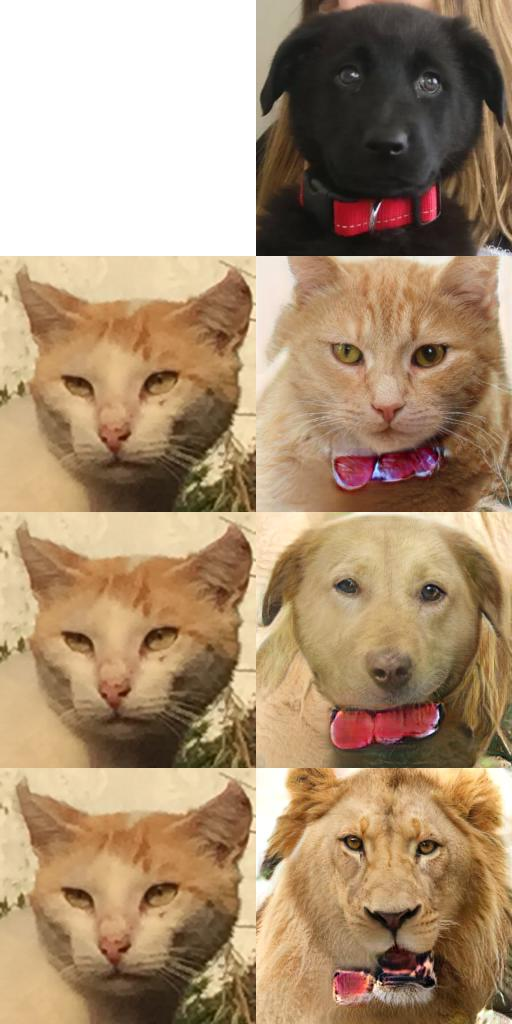

In [10]:
# 1. SOURCE IMAGE PATH
source_image = "dog/lca_dog.jpg"
# 2. REFRENCE IMAGE PATH
reference_image = "cat/ss_cat.jpg"
# 3. Optional: output image file name
output_image_file = "starganv2_cross.jpg"

# a bit of argument manipulation
# if source_image and/or reference_image is empty (set to "") above, 
# use default range of example images from StarGAN-v2 repository
EXAMPLES_DIR = "sample_images/"
DEFAULT_SRC = "stargan-v2/assets/representative/afhq/src"
DEFAULT_REF = "stargan-v2/assets/representative/afhq/ref"
src = EXAMPLES_DIR + source_image if source_image else DEFAULT_SRC
ref = EXAMPLES_DIR + reference_image if reference_image else DEFAULT_REF

!python stargan-v2/main.py --mode custom \
                           -o $output_image_file \
                           -s $src \
                           -r $ref

from IPython.display import Image
Image(output_image_file)